#  Import Required Libraries

In [53]:
import os
import json
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Load the Haar Cascade face detector from OpenCV

In [54]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [55]:
def detect_faces(image_path):
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    plt.imshow(rgb_image)
    plt.axis('off')
    plt.show()

    return len(faces)

## Check working for an Image

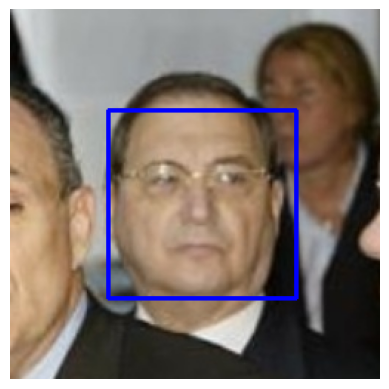

Number of faces detected: 1


In [56]:
image_path = '/kaggle/input/faces-dataset/027.jpg'
number_of_faces = detect_faces(image_path)
if number_of_faces==0:
    print('No faces detected')
else:
    print(f'Number of faces detected: {number_of_faces}')

## Hyperparameter Tuning

In [57]:
def detect_face(image_path, scaleFactor, minNeighbors, minSize):
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors=minNeighbors, minSize=minSize)
    return len(faces)

In [58]:
def evaluate(face_dataset,non_face_dataset, scaleFactor, minNeighbors, minSize):
    TP,FP,TN,FN=0,0,0,0
    #for the face_datset
    for image in os.listdir(face_dataset):
        image_path=os.path.join(face_dataset,image)
        if detect_face(image_path, scaleFactor, minNeighbors, minSize)>0:
            TP+=1
        else:
            FN+=1
    for image in os.listdir(non_face_dataset):
        image_path=os.path.join(non_face_dataset,image)
        if detect_face(image_path, scaleFactor, minNeighbors, minSize)>0:
            FP+=1
        else:
            TN+=1
        #Accuracy
    if (TP+TN+FN+FP)>0:
        Accuracy= (TP+TN)/(TP+TN+FN+FP)
    else: 
        Accuracy=0
    return Accuracy

In [59]:
face_dataset_path='/kaggle/input/faces-dataset'
non_face_dataset_path='/kaggle/input/non-faces-dataset'

In [60]:
def hyperparameter_tuning(face_dataset, non_face_dataset):
    best_params = {}
    best_accuracy = 0

    # Parameters to tune
    scaleFactors = [1.05, 1.1, 1.2]
    minNeighbors_list = [3, 5, 7]
    minSizes = [(20, 20), (30, 30)]

    for scaleFactor in scaleFactors:
        for minNeighbors in minNeighbors_list:
            for minSize in minSizes:
                accuracy = evaluate(face_dataset, non_face_dataset, scaleFactor, minNeighbors, minSize)
                print(f"scaleFactor={scaleFactor}, minNeighbors={minNeighbors}, minSize={minSize}, Accuracy={accuracy:.2f}")
                
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = {
                        "scaleFactor": scaleFactor,
                        "minNeighbors": minNeighbors,
                        "minSize": minSize
                    }

    print(f"Best Parameters: {best_params}, Best Accuracy: {best_accuracy:.2f}")

In [61]:
hyperparameter_tuning(face_dataset_path, non_face_dataset_path)

scaleFactor=1.05, minNeighbors=3, minSize=(20, 20), Accuracy=0.80
scaleFactor=1.05, minNeighbors=3, minSize=(30, 30), Accuracy=0.82
scaleFactor=1.05, minNeighbors=5, minSize=(20, 20), Accuracy=0.88
scaleFactor=1.05, minNeighbors=5, minSize=(30, 30), Accuracy=0.90
scaleFactor=1.05, minNeighbors=7, minSize=(20, 20), Accuracy=0.92
scaleFactor=1.05, minNeighbors=7, minSize=(30, 30), Accuracy=0.93
scaleFactor=1.1, minNeighbors=3, minSize=(20, 20), Accuracy=0.89
scaleFactor=1.1, minNeighbors=3, minSize=(30, 30), Accuracy=0.91
scaleFactor=1.1, minNeighbors=5, minSize=(20, 20), Accuracy=0.96
scaleFactor=1.1, minNeighbors=5, minSize=(30, 30), Accuracy=0.96
scaleFactor=1.1, minNeighbors=7, minSize=(20, 20), Accuracy=0.98
scaleFactor=1.1, minNeighbors=7, minSize=(30, 30), Accuracy=0.98
scaleFactor=1.2, minNeighbors=3, minSize=(20, 20), Accuracy=0.94
scaleFactor=1.2, minNeighbors=3, minSize=(30, 30), Accuracy=0.94
scaleFactor=1.2, minNeighbors=5, minSize=(20, 20), Accuracy=0.97
scaleFactor=1.2, mi